<a href="https://colab.research.google.com/github/l0rdyolo/AI/blob/main/omerfarukcinoglu_pso_cozum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_path = "/content/drive/MyDrive/Colab Notebooks/2025/kku_ai_final/data.csv"
df = pd.read_csv(data_path)
df.head()

,x,y
0,-5.0,-298.108727
1,-4.9,-255.602630
2,-4.8,-175.073026
3,-4.7,-230.140740
4,-4.6,-166.632522


In [6]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

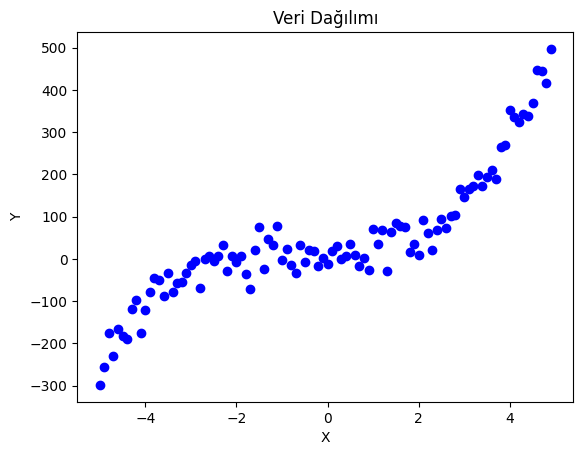

In [7]:
plt.scatter(x, y, color='blue', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Veri Dağılımı')
plt.show()

In [11]:
def mse_fitness(params, x, y):
    predictions = params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]
    mse = np.mean((y - predictions) ** 2)
    return mse

In [12]:
num_particles = 50  # Parçacık sayısı
num_dimensions = 4  # Polinom katsayıları (a, b, c, d)
num_iterations = 100  # Döngü sayısı
w = 0.5  # Eylemsizlik katsayısı
c1 = 1.5  # Bireysel öğrenme katsayısı
c2 = 1.5  # Sosyal öğrenme katsayısı

In [17]:
positions = np.random.uniform(-10, 10, (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))
personal_best_positions = positions.copy()
personal_best_scores = np.array([mse_fitness(pos, x, y) for pos in positions])
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

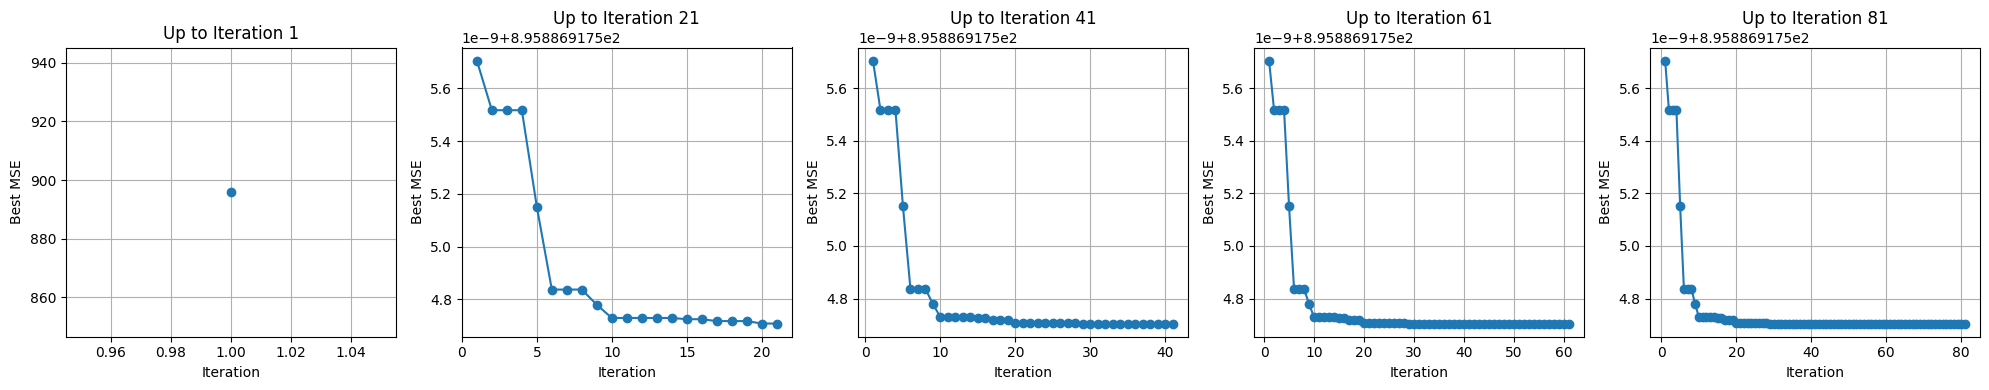

In [19]:
fitness_history = []

for iteration in range(num_iterations):
    for i in range(num_particles):
        fitness = mse_fitness(positions[i], x, y)

        if fitness < personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = positions[i]

        if fitness < global_best_score:
            global_best_score = fitness
            global_best_position = positions[i]

    r1 = np.random.uniform(0, 1, (num_particles, num_dimensions))
    r2 = np.random.uniform(0, 1, (num_particles, num_dimensions))
    velocities = (
        w * velocities +
        c1 * r1 * (personal_best_positions - positions) +
        c2 * r2 * (global_best_position - positions)
    )
    positions += velocities

    fitness_history.append(global_best_score)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

step = len(fitness_history) // 5
indices = [i * step for i in range(5)]

for idx, ax in zip(indices, axes):
    partial_history = fitness_history[:idx + 1]
    ax.plot(range(1, len(partial_history) + 1), partial_history, marker='o', linestyle='-')
    ax.set_title(f"Up to Iteration {idx + 1}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Best MSE")
    ax.grid()

plt.tight_layout()
plt.show()


En iyi katsayılar (PSO): [ 3.09308919  4.78066015  0.14577337 11.39471034]


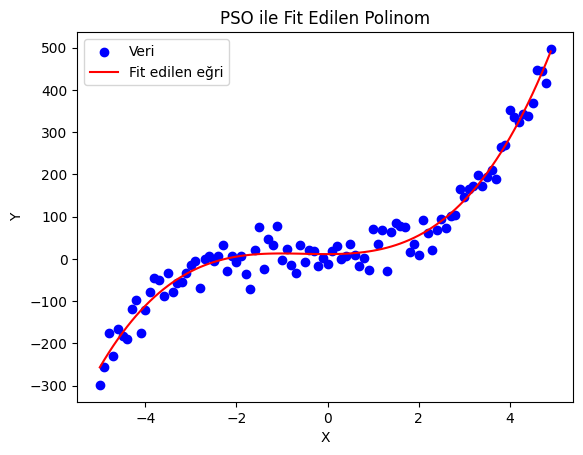

In [20]:
best_params = global_best_position
print("En iyi katsayılar (PSO):", best_params)

a, b, c, d = best_params
predictions = a * x**3 + b * x**2 + c * x + d

plt.scatter(x, y, color='blue', label='Veri')
plt.plot(x, predictions, color='red', label='Fit edilen eğri')
plt.title('PSO ile Fit Edilen Polinom')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
